In [2]:
import pathlib
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv('C:\\Users\\bilbe\\OneDrive\\سطح المكتب\\ai_roadmap\\tensorflow\\TF_Files-3.2_Keras_Examples\\auto-mpg.data', names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy() # create a copy of dataset.
dataset.tail(8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [27]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [28]:
dataset = dataset.dropna()

In [29]:
Origin = dataset.pop('Origin')

In [30]:
# the data refers to if the Origin == USA let it equal 1,else if Origin == Europa let it = 2 else Origin == japan let it =3
dataset['USA'] = (Origin == 1)*1.0
dataset['Europa'] = (Origin == 2)*1.0
dataset['japan'] = (Origin == 3)*1.0
# now we have three columns and eachone will equal to 1 or 0

In [31]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europa,japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [35]:
#splite data
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

C:\Users\bilbe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


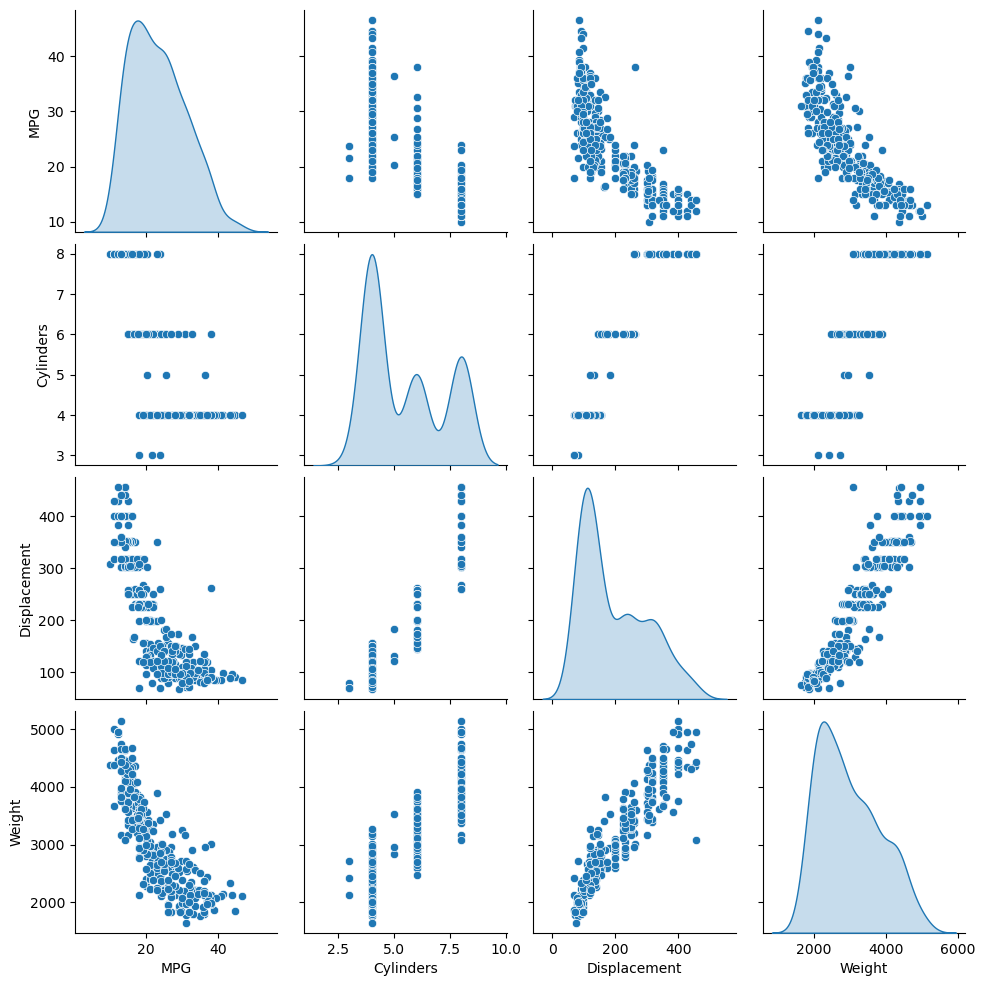

In [36]:
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement","Weight"]],diag_kind="kde")

In [37]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europa,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [39]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [41]:
#Normalization
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [45]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(train_dataset.keys())]),
        layers.Dense(64,activation =tf.nn.relu),
        layers.Dense(1)# Use one where you are using Regression.
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                 metrics=['mean_absolute_error','mean_squared_error'])
    
    return model

In [46]:
model = build_model()

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 328ms/step


array([[ 0.01602791],
       [ 0.04425508],
       [-0.07601064],
       [ 0.03398309],
       [ 0.05649103],
       [-0.03250808],
       [ 0.0639649 ],
       [ 0.30093417],
       [-0.18757668],
       [-0.22572011]], dtype=float32)

In [50]:
#display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.',end='')
        
EPOCHS = 1000

tarih = model.fit(normed_train_data,train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()])





....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................................................

In [53]:
hist = pd.DataFrame(tarih.history)
hist['epoch'] = tarih.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.217628,1.209885,3.217628,10.521800,2.463469,10.521800,995
996,3.231143,1.108319,3.231143,10.585804,2.386526,10.585804,996
997,3.061468,1.128173,3.061468,10.599878,2.451736,10.599878,997
998,3.258037,1.134032,3.258037,10.930126,2.412369,10.930126,998
999,3.231049,1.192195,3.231049,10.641737,2.482387,10.641737,999


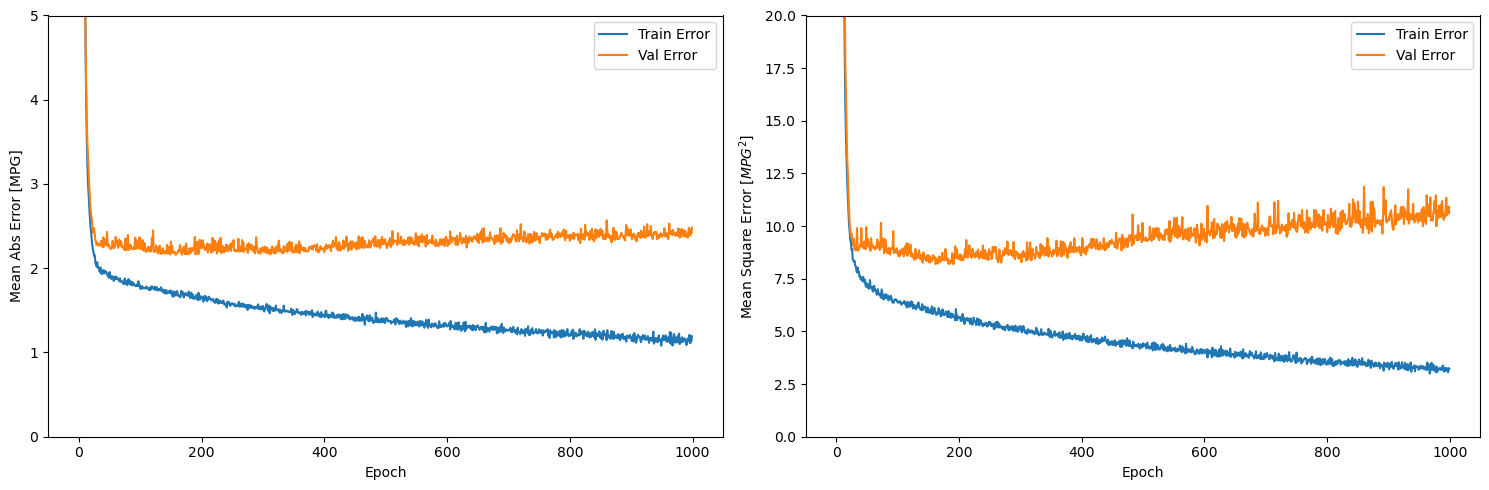

In [62]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # Create a figure with two subplots

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Mean Abs Error [MPG]')
    ax1.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Val Error')
    ax1.set_ylim([0, 5])
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Mean Square Error [$MPG^2$]')
    ax2.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    ax2.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
    ax2.set_ylim([0, 20])
    ax2.legend()

    plt.tight_layout()  # Adjust subplot layout to fit labels
    plt.show()

plot_history(tarih)
    


..................................................................................................

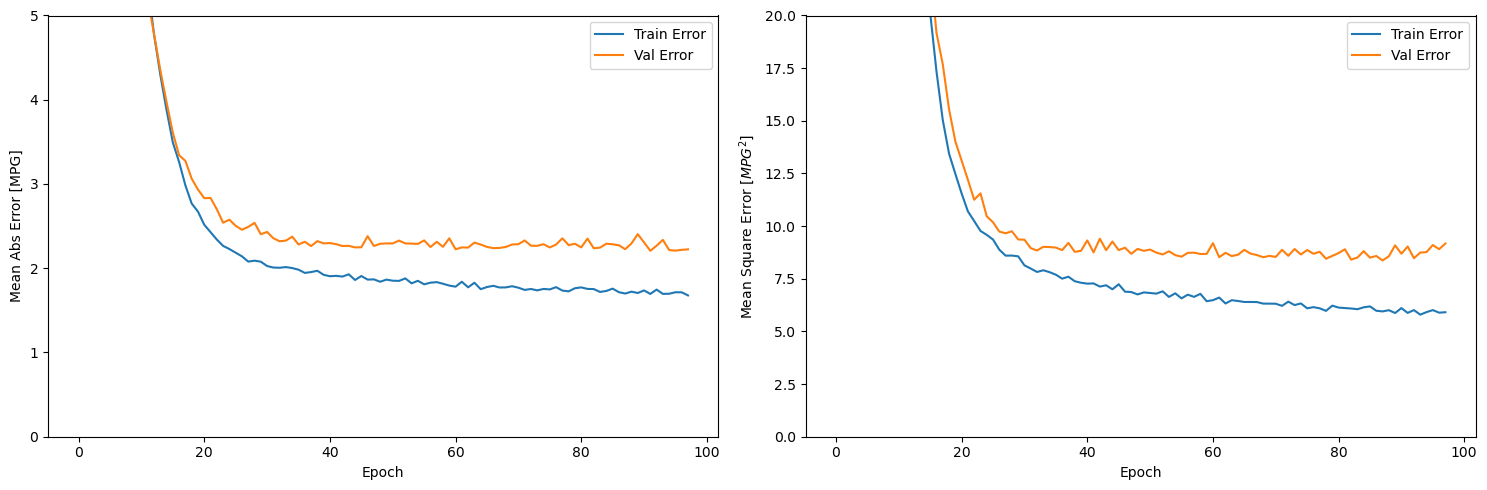

In [65]:
model = build_model()
# the patience parameter is the amount of epochto check for improvement 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
tarih = model.fit(normed_train_data,train_labels,epochs=EPOCHS, validation_split=0.2,verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(tarih)


In [67]:
loss,mae,mse = model.evaluate(normed_test_data,test_labels,verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.14 MPG


3/3 [==============================] - 0s 4ms/step


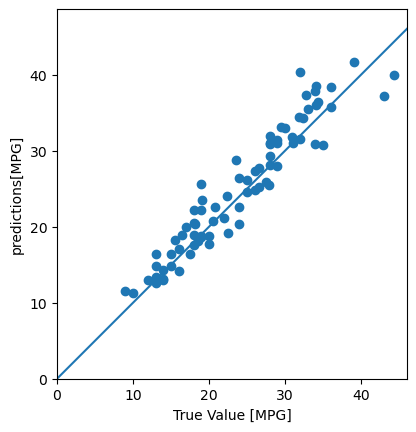

In [69]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('True Value [MPG]')
plt.ylabel('predictions[MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

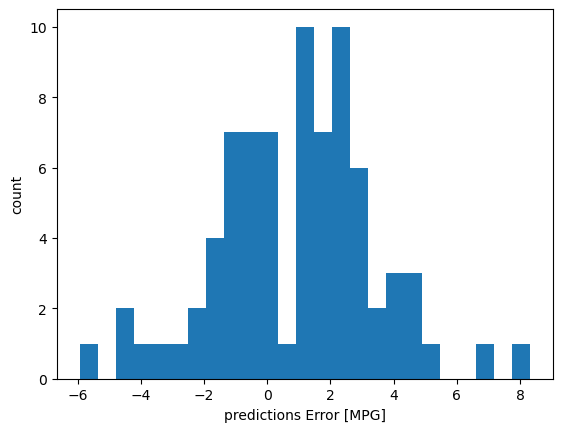

In [70]:
error = test_predictions -test_labels
plt.hist(error,bins=25)
plt.xlabel("predictions Error [MPG]")
_ = plt.ylabel("count")